In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
bos = pd.read_csv('C:\\Users\\ABC\\6. Datasets\\BostonHousing.csv')
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
pwd

'C:\\Users\\ABC\\3. Edureka\\1. Linear Regression'

In [4]:
x = bos.drop('medv', axis = 1)
y = bos['medv']
lm = LinearRegression()

In [5]:
#Multiple values for i to check the best combination of highly accurate data usinf r2

for i in range(50, 57):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,  random_state = i)
    model = lm.fit(x_train, y_train)
    y_predict = lm.predict(x_test)
    r2 = r2_score
    acc = r2(y_test, y_predict)
    print(f'rs:{i} - {acc}')

rs:50 - 0.6010827499871458
rs:51 - 0.7744133020923889
rs:52 - 0.7840524837075913
rs:53 - 0.6828652370954695
rs:54 - 0.6183973622595971
rs:55 - 0.8298115137261569
rs:56 - 0.8551572657585602


In [6]:
#Attempting the same using OLS
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                        0.00
Time:                        08:25:37   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

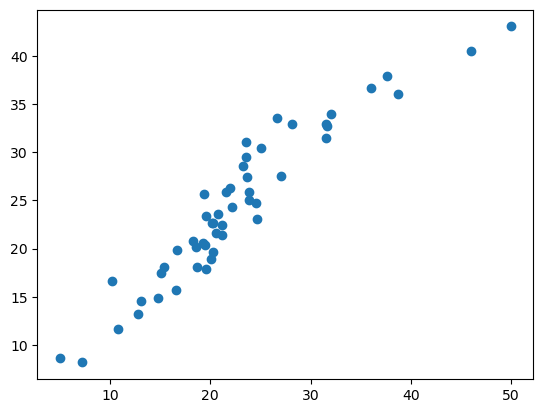

In [8]:
#Checking the relationship between predicted vs actual test variables 
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict)

In [9]:
result = pd.DataFrame({'y_test':y_test, 'y_predict':y_predict})
result['diff'] = result['y_test'] - result['y_predict']
result['diff'].sort_values().head()

88    -7.475388
220   -6.871642
426   -6.480046
66    -6.250671
173   -5.912196
Name: diff, dtype: float64

In [10]:
bos2 = pd.read_csv('C:\\Users\\ABC\\6. Datasets\\BostonHousing2.csv')

In [11]:
y_predict2 = lm.predict(bos2)

In [12]:
bos2['new_med'] = y_predict2
bos2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,new_med
0,0.17004,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,30.293569
1,0.21124,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,25.310179
2,0.14455,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,30.763825
3,0.08829,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,28.827087
4,0.02985,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,28.141110
5,0.06905,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,25.577926
6,0.03237,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,23.202560
7,0.02729,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,19.707496
8,0.02731,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,11.589702
9,0.00632,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,19.100803


In [13]:
    r2 = r2_score
    acc = r2(y_test, y_predict)
    print(f'rs:{i} - {acc}')

rs:56 - 0.8551572657585602


In [ ]:
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

fit = np.polyfit(x,y, deg = 1)
ax.plot(x, fit[0] * x + fit[1], colors = 'red')